In [0]:
# Import numpy, time, matplotlib, Keras models, backend, layers and utils
# set random seed using random.seed from numpy

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Import cifar10 from keras datasets
# Load CIFAR10 dataset from Keras datasets module seperately as train and test datasets
# Obtain number of training and testing examples, image dimensions and number of classes

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


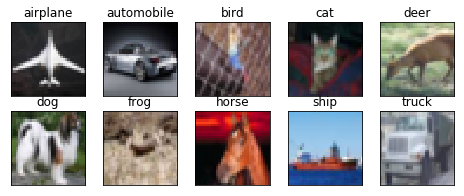

In [0]:
# Display images corresponding to each class from training dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Define function to plot summarize history for accuracy and loss

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Define function to calculate accuracy

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Convert the Tensor i.e. train and test dataset to float tensors. Also perform a min-max normalization where min = 0 and max = 255
# # Convert 1-dimensional class arrays to num_classes-dimensional class matrices

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0615 11:55:11.224214 140220136118144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0615 11:55:11.264434 140220136118144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 11:55:11.271422 140220136118144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 13s 32ms/step - loss: 1.8338 - acc: 0.3013 - val_loss: 1.5057 - val_acc: 0.4612
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3344 - acc: 0.5173 - val_loss: 1.1030 - val_acc: 0.6068
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 1.1218 - acc: 0.6034 - val_loss: 0.9531 - val_acc: 0.6603
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9889 - acc: 0.6526 - val_loss: 0.9107 - val_acc: 0.6785
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9011 - acc: 0.6862 - val_loss: 0.7776 - val_acc: 0.7310
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8212 - acc: 0.7164 - val_loss: 0.7606 - val_acc: 0.7393
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7711 - acc: 0.7344 - val_loss: 0.7309 - val_acc: 0.7473
Epoch 8/100
390/390 [==============================] - 9s 23m

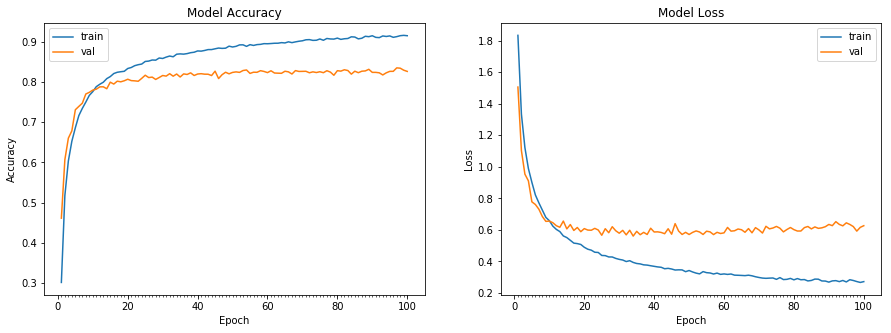

Accuracy on test data is: 82.64


In [0]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


*   Validation accuracy for best model is 83.52
*   Validation accuracy at the last epoch is 82.64




In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1
# L2 regularization of 1e-2 i.e. kernel regularization is used in all convolution layers

from keras.regularizers import l2


model = Sequential()
model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2), input_shape=(32, 32, 3))) #Input channel 3, number of filters 64, filter size is 3x3 with 3 channels. Receptive field is 3x3. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 5x5. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 7x7. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False, kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 7x7. Output Images size 32. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 14x14. Output Images size 16. This is MaxPooling layer.


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 16x16. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 18x18. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 32 channels. Receptive field is 18x18. Output Images size 16. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 36x36. Output Images size 8. This is MaxPooling layer.


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 38x38. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 40x40. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
#model.add(BatchNormalization()) # BatchNormalization layer
#model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(num_classes, 8, 8, use_bias=False,)) #Input channel 128, number of filters 10 i.e. num_classes, filter size is 8X8 with 128 channels.

model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax activation layer.So that the values of logits are squished between 0 and 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packa

In [0]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1728      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73728     
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 128)       512       
__________

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`


Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 37s 190ms/step - loss: 3.9588 - acc: 0.3893 - val_loss: 4.0727 - val_acc: 0.1739

Epoch 00001: val_acc improved from -inf to 0.17390, saving model to best_model.h5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 34s 176ms/step - loss: 1.5589 - acc: 0.6033 - val_loss: 2.9058 - val_acc: 0.2439

Epoch 00002: val_acc improved from 0.17390 to 0.24390, saving model to best_model.h5
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 34s 177ms/step - loss: 1.3100 - acc: 0.6757 - val_loss: 1.7181 - val_acc: 0.5355

Epoch 00003: val_acc improved from 0.24390 to 0.53550, saving model to best_model.h5
Epoch 4/80

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [===========================

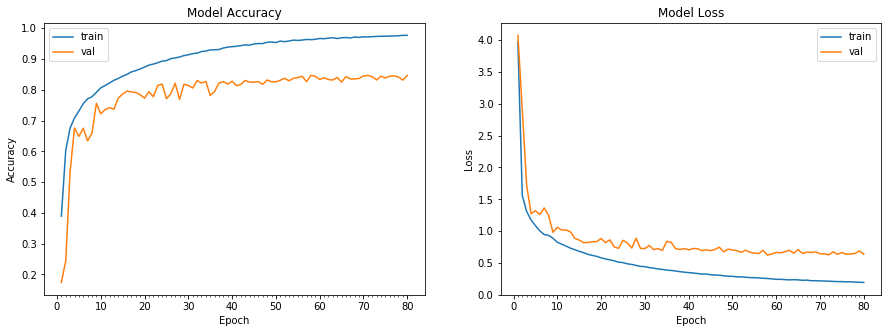

Accuracy on test data is: 84.64


In [0]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 84.69
*   Validation accuracy at the last epoch is 84.64

### Design the network architecture (CNN) by following the below guidelines for CIFAR10 dataset

*   Design the network such that the final receptive field is around 64x64 / 72x72 for CIFAR 10 data set.
*   MaxPool is placed only after edges & gradients are created. This is when receptive reaches 7x7 or 9x9 for CIFAR10 data set

#### Architecture type 1

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block3: 32 -- 64 -- 128  
+ Block4: 32 -- 64 -- 128 -- Softmax


#### Architecture type 2

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: ====64 -- 128 -- 128/256 --  128/256/512 -- MaxPool
+ Block3: ========128 -- 128/256 --  128/256/512   
+ Block4: =============128/256 --  128/256/512 -- 128/256/512/1024 -- Softmax

#### Architecture type1

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block3: 32 -- 64 -- 128  
+ Block4: 32 -- 64 -- 128 -- Softmax

In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1
# L2 regularization of 1e-2 i.e. kernel regularization is used in all convolution layers. Image normalization is not used.

from keras.regularizers import l2


model = Sequential()
model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2), input_shape=(32, 32, 3))) #Input channel 3, number of filters 32, filter size is 3x3 with 3 channels. Receptive field is 3x3. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 5x5. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 7x7. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 9x9. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False, kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 9x9. Output Images size 32. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 18x18. Output Images size 16. This is MaxPooling layer.


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 20x20. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 22x22. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 24x24. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 26x26. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(32, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 26x26. Output Images size 16. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 32, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 52x52. Output Images size 8. This is MaxPooling layer.


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 54x54. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 56x56. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 58x58. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(32, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 32, filter size is 1x1 with 128 channels. Receptive field is 58x58. Output Images size 8. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 32, filter size is 3x3 with 32 channels. Receptive field is 60x60. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 62x62. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 64x64. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
#model.add(BatchNormalization()) # BatchNormalization layer
#model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(num_classes, 8, 8, use_bias=False,)) #Input channel 128, number of filters 10 i.e. num_classes, filter size is 8X8 with 128 channels.

model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax activation layer.So that the values of logits are squished between 0 and 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 32, 32, 32)        864       
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_98 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 32, 32, 64)        18432     
_________________________________________________________________
activation_114 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 32, 32, 64)        256       
__________

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint('best_model_arch1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`


Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 49s 252ms/step - loss: 7.9644 - acc: 0.1112 - val_loss: 4.0691 - val_acc: 0.1000

Epoch 00001: val_acc improved from -inf to 0.10000, saving model to best_model_arch1.h5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 40s 203ms/step - loss: 2.7992 - acc: 0.3221 - val_loss: 2.8490 - val_acc: 0.1449

Epoch 00002: val_acc improved from 0.10000 to 0.14490, saving model to best_model_arch1.h5
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 40s 205ms/step - loss: 1.9772 - acc: 0.4506 - val_loss: 2.7307 - val_acc: 0.2090

Epoch 00003: val_acc improved from 0.14490 to 0.20900, saving model to best_model_arch1.h5
Epoch 4/80

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [=========

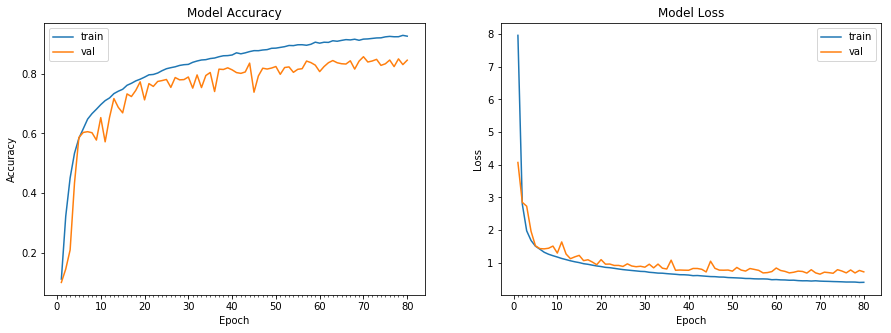

Accuracy on test data is: 84.54


In [0]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 85.70
*   Validation accuracy at the last epoch is 84.54

#### Architecture type 2

+ Block1: 32 -- 64 -- 128 -- 128/256 --  MaxPool
+ Block2: ====64 -- 128 -- 128/256 --  128/256/512 -- MaxPool
+ Block3: ========128 -- 128/256 --  128/256/512   
+ Block4: =============128/256 --  128/256/512 -- 128/256/512/1024 -- Softmax

In [0]:
# Create a CNN model using Keras functions. Use relu for all layers, except at the end. The logits are passed into softmax layer to represent everything between 0 and 1
# L2 regularization of 1e-2 i.e. kernel regularization is used in all convolution layers Image normalization is not used.

from keras.regularizers import l2


model = Sequential()
model.add(Convolution2D(32, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2), input_shape=(32, 32, 3))) #Input channel 3, number of filters 32, filter size is 3x3 with 3 channels. Receptive field is 3x3. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 32, number of filters 64, filter size is 3x3 with 32 channels. Receptive field is 5x5. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 7x7. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 9x9. Output Images size 32.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(64, 1, 1, use_bias=False, kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 64, filter size is 1x1 with 128 channels. Receptive field is 9x9. Output Images size 32. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 64, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 18x18. Output Images size 16. This is MaxPooling layer.


model.add(Convolution2D(64, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 64, filter size is 3x3 with 64 channels. Receptive field is 20x20. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 64, number of filters 128, filter size is 3x3 with 64 channels. Receptive field is 22x22. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 24x24. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 26x26. Output Images size 16.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 128, filter size is 1x1 with 256 channels. Receptive field is 26x26. Output Images size 16. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(MaxPooling2D(pool_size=(2, 2))) #Input channel 128, number of filters n/a, filter size is n/a with n/a channels. Receptive field is 52x52. Output Images size 8. This is MaxPooling layer.


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 54x54. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 56x56. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 58x58. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 1, 1, use_bias=False,  kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 128, filter size is 1x1 with 256 channels. Receptive field is 58x58. Output Images size 8. This is transition block.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(128, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 128, filter size is 3x3 with 128 channels. Receptive field is 60x60. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 128, number of filters 256, filter size is 3x3 with 128 channels. Receptive field is 62x62. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
model.add(BatchNormalization()) # BatchNormalization layer
model.add(Dropout(0.1)) # Droput is set to 0.1

model.add(Convolution2D(256, 3, 3, use_bias=False, border_mode='same', kernel_regularizer=l2(1e-2))) #Input channel 256, number of filters 256, filter size is 3x3 with 256 channels. Receptive field is 64x64. Output Images size 8.
model.add(Activation('relu')) # Setup activation function as RELU
#model.add(BatchNormalization()) # BatchNormalization layer
#model.add(Dropout(0.1)) # Droput is set to 0.1


model.add(Convolution2D(num_classes, 8, 8, use_bias=False,)) #Input channel 256, number of filters 10 i.e. num_classes, filter size is 8X8 with 256 channels.

model.add(Flatten()) #The outputs from the previous layer are flattened
model.add(Activation('softmax')) #Softmax activation layer.So that the values of logits are squished between 0 and 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: Us

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Displays the summary of the model i.e. gives the details of different shapes and channels in different layers of the model.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 32, 32, 32)        864       
_________________________________________________________________
activation_131 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_109 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_114 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 32, 32, 64)        18432     
_________________________________________________________________
activation_132 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_110 (Bat (None, 32, 32, 64)        256       
__________

In [0]:
# Compiles the model i.e. specify loss, type of optimizer to use while training, metrics that needs to be calculated and displayed.

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 +  0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# create a checkpoint to save the model when accuracy improves

from keras.callbacks import *
checkpoint = ModelCheckpoint('best_model_arch2.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=80)`


Epoch 1/80

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
195/195 [==============================] - 63s 321ms/step - loss: 12.2492 - acc: 0.1709 - val_loss: 20.5552 - val_acc: 0.1009

Epoch 00001: val_acc improved from -inf to 0.10090, saving model to best_model_arch2.h5
Epoch 2/80

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 53s 270ms/step - loss: 5.2258 - acc: 0.2594 - val_loss: 4.1610 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.10090
Epoch 3/80

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 53s 272ms/step - loss: 4.5703 - acc: 0.2729 - val_loss: 5.4715 - val_acc: 0.1555

Epoch 00003: val_acc improved from 0.10090 to 0.15550, saving model to best_model_arch2.h5
Epoch 4/80

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [==============================] - 54s 275ms/step

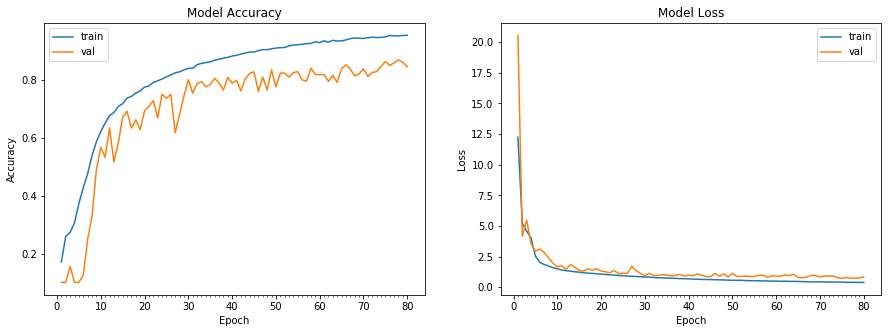

Accuracy on test data is: 84.62


In [0]:
# Train the model using fit_generator function. Also calculate and display total time taken for training. Along with this plot summarize history for accuracy and loss. Display accuracy on validation dataset.

from keras.preprocessing.image import ImageDataGenerator
from math import ceil

#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, horizontal_flip=False)

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

#datagen.fit(train_features)

#validation_steps = ceil(len(test_features)/ 128)


# train the model
start = time.time()
# Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                 validation_data = datagen.flow(test_features, test_labels, batch_size= 128, shuffle = False), validation_steps=validation_steps, verbose=1)

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callbacks_list)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

*   Validation accuracy for best model is 86.95
*   Validation accuracy at the last epoch is 84.62

### **References & Attributions:**

*   Keras (https://keras.io/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*